In [38]:
import pandas as pd
import seaborn as sns
import numpy as np

In [43]:
anscombe = sns.load_dataset("anscombe")

In [2]:
data_file = pd.read_csv('Heart-disease/heart.csv')

In [3]:
data_file.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data_file

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
data_file.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
object_col = [x for x in data_file.columns if data_file[x].dtype == 'object']
object_col

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [7]:
values_per_col = {}
na_per_col = {}

for x in data_file[object_col]:
    values_per_col[x] = data_file[x].value_counts()
    na_per_col[x] = data_file[x].isnull().sum()


In [8]:
na_per_col

{'Sex': 0,
 'ChestPainType': 0,
 'RestingECG': 0,
 'ExerciseAngina': 0,
 'ST_Slope': 0}

In [9]:
values_per_col

{'Sex': M    725
 F    193
 Name: Sex, dtype: int64,
 'ChestPainType': ASY    496
 NAP    203
 ATA    173
 TA      46
 Name: ChestPainType, dtype: int64,
 'RestingECG': Normal    552
 LVH       188
 ST        178
 Name: RestingECG, dtype: int64,
 'ExerciseAngina': N    547
 Y    371
 Name: ExerciseAngina, dtype: int64,
 'ST_Slope': Flat    460
 Up      395
 Down     63
 Name: ST_Slope, dtype: int64}

In [10]:
data_file['ExerciseAngina'].replace({'N':0}, inplace=True)
data_file['ExerciseAngina'].replace({'Y':1}, inplace=True)


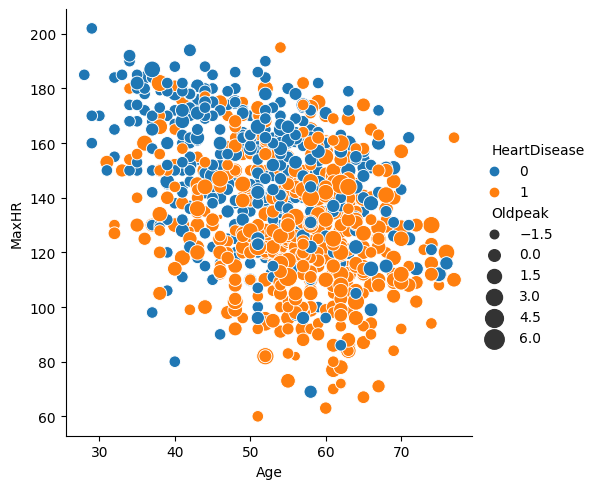

In [11]:
sns.relplot(data=data_file ,x='Age', y='MaxHR', hue='HeartDisease', size='Oldpeak', sizes=(15,200))

In [21]:
maxHR_Age = pd.DataFrame(data_file, columns=['Age','MaxHR','Oldpeak','HeartDisease'])
id_noDisease = maxHR_Age.loc[lambda x: x['HeartDisease'] ==0]
id_yDisease = maxHR_Age.loc[lambda x: x['HeartDisease'] ==1]

In [22]:
id_yDisease

,Age,MaxHR,Oldpeak,HeartDisease
1,49,156,1.0,1
3,48,108,1.5,1
8,37,130,1.5,1
11,58,99,2.0,1
13,49,140,1.0,1
...,...,...,...,...
912,57,123,0.2,1
913,45,132,1.2,1
914,68,141,3.4,1
915,57,115,1.2,1


In [13]:
id_noDisease

,Age,MaxHR,Oldpeak,HeartDisease
0,40,172,0.0,0
2,37,98,0.0,0
4,54,122,0.0,0
5,39,170,0.0,0
6,45,170,0.0,0
...,...,...,...,...
903,56,163,0.0,0
904,56,169,0.0,0
906,55,166,1.2,0
910,41,182,0.0,0


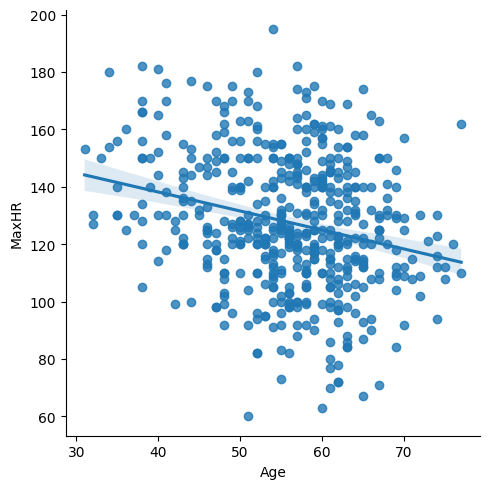

In [52]:
sns.lmplot(id_yDisease, x='Age',y='MaxHR')

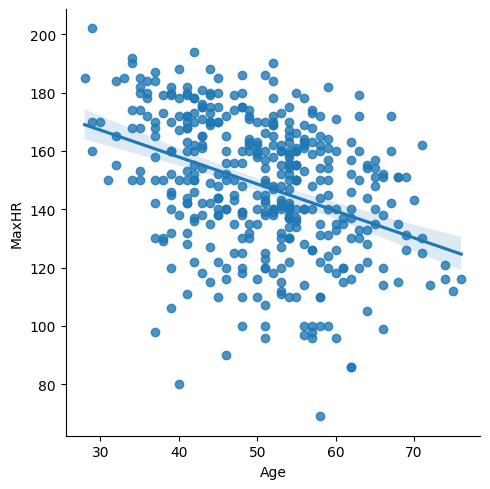

In [41]:
sns.lmplot(id_noDisease, x='Age',y='MaxHR')